# Predicting Compressive Strength of Concrete

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df=pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [5]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.dtypes

cement          float64
slag            float64
ash             float64
Water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
df.describe()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Exploratory Data Analysis

### Cement

In [10]:
# Quartiles

from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [11]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [12]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', df[df['cement']>586.4375].count())
print('Number of outliers in cem#ent lower: ', df[df['cement']<-44.0625].count())

Number of outliers in cement upper:  cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
Number of outliers in cem#ent lower:  cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


<AxesSubplot:xlabel='cement'>

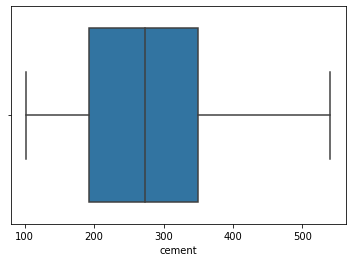

In [13]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=df, orient='h')

C:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


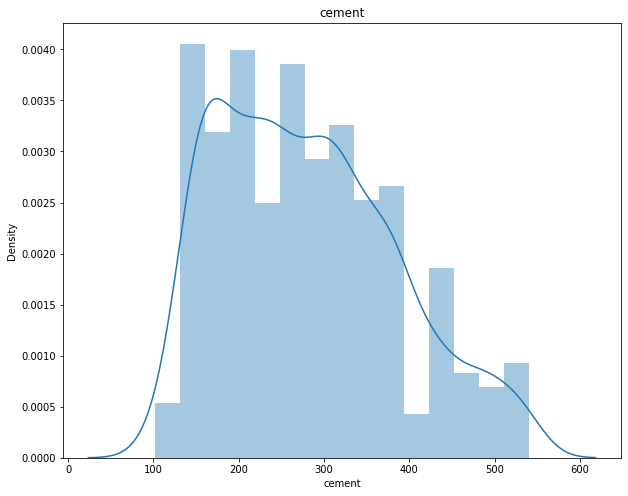

In [14]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title('cement')
plt.show()

### Water

In [15]:
#Quartiles

w_Q1=df['Water'].quantile(q=0.25)
w_Q3=df['Water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['Water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [16]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [17]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', df[df['Water']<124.25000000000001]['Water'].count())


Number of outliers in water upper:  4
Number of outliers in water lower:  5


<AxesSubplot:xlabel='Water'>

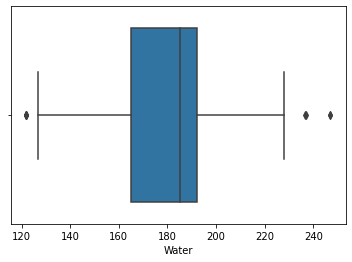

In [18]:
#Distribution of WATER

sns.boxplot(x='Water', data=df, orient='h')

C:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


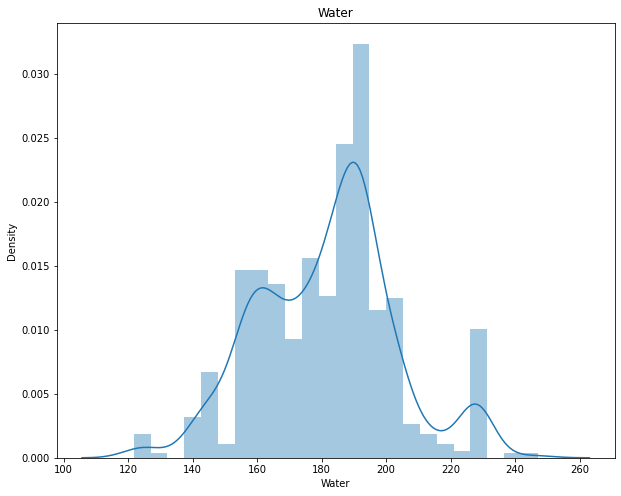

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['Water']).set_title('Water')
plt.show()

### Slag


In [20]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in slag: ',L_outliers)
print('Upper outlier in slag: ',U_outliers)

Lower outlier in slag:  -44.0625
Upper outlier in slag:  586.4375


In [21]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in slag upper: ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', df[df['slag']<-214.425]['slag'].count())

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


<AxesSubplot:xlabel='slag'>

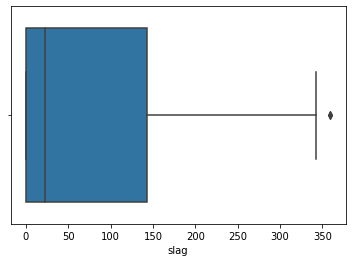

In [22]:
#Distribution of SLAG

sns.boxplot(x='slag', data=df, orient='h')

In [23]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [24]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [25]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<AxesSubplot:xlabel='age'>

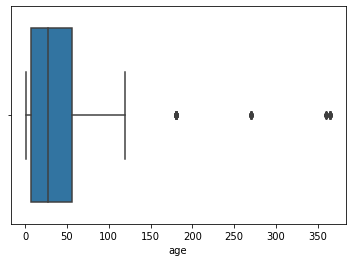

In [26]:
#Distribution of AGE

sns.boxplot(x='age', data=df, orient='h')

In [27]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

In [28]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.405
Upper outlier in ash:  295.675


In [29]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<AxesSubplot:xlabel='ash'>

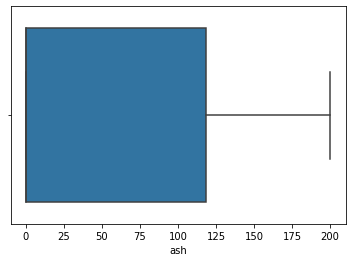

In [30]:
#Distribution of AGE

sns.boxplot(x='ash', data=df, orient='h')

## Multivariate Analysis


C:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

<AxesSubplot:xlabel='strength', ylabel='Density'>

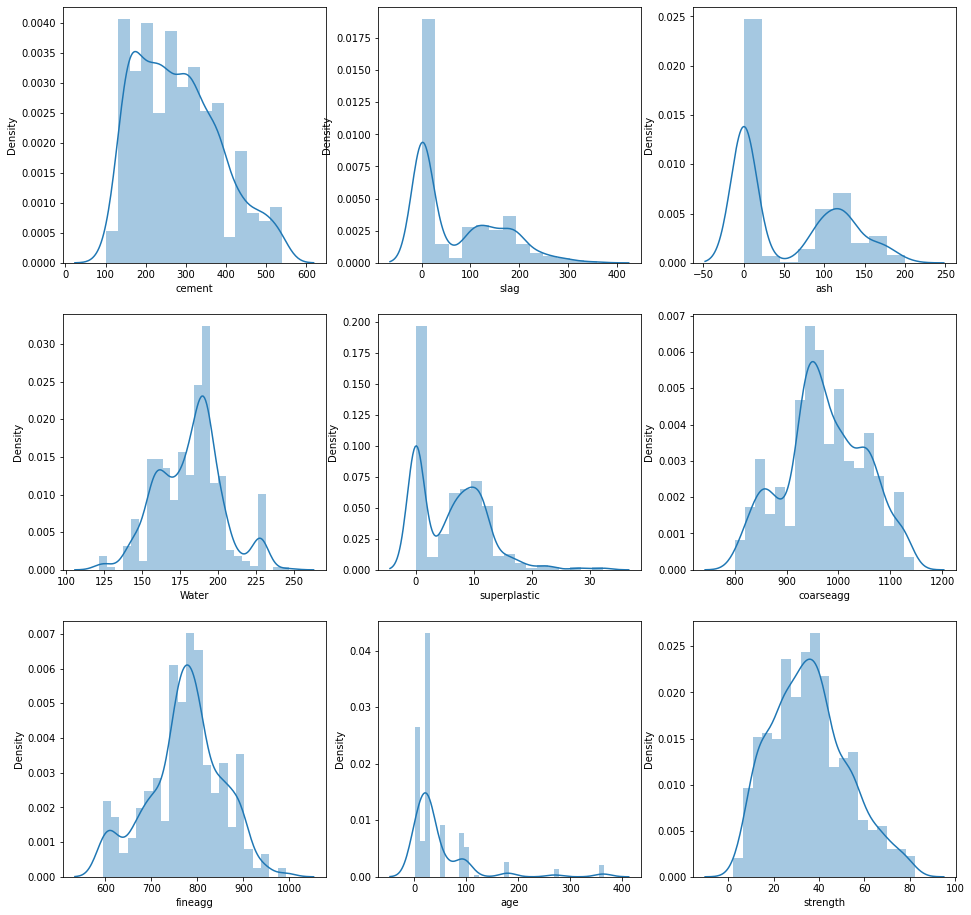

In [31]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

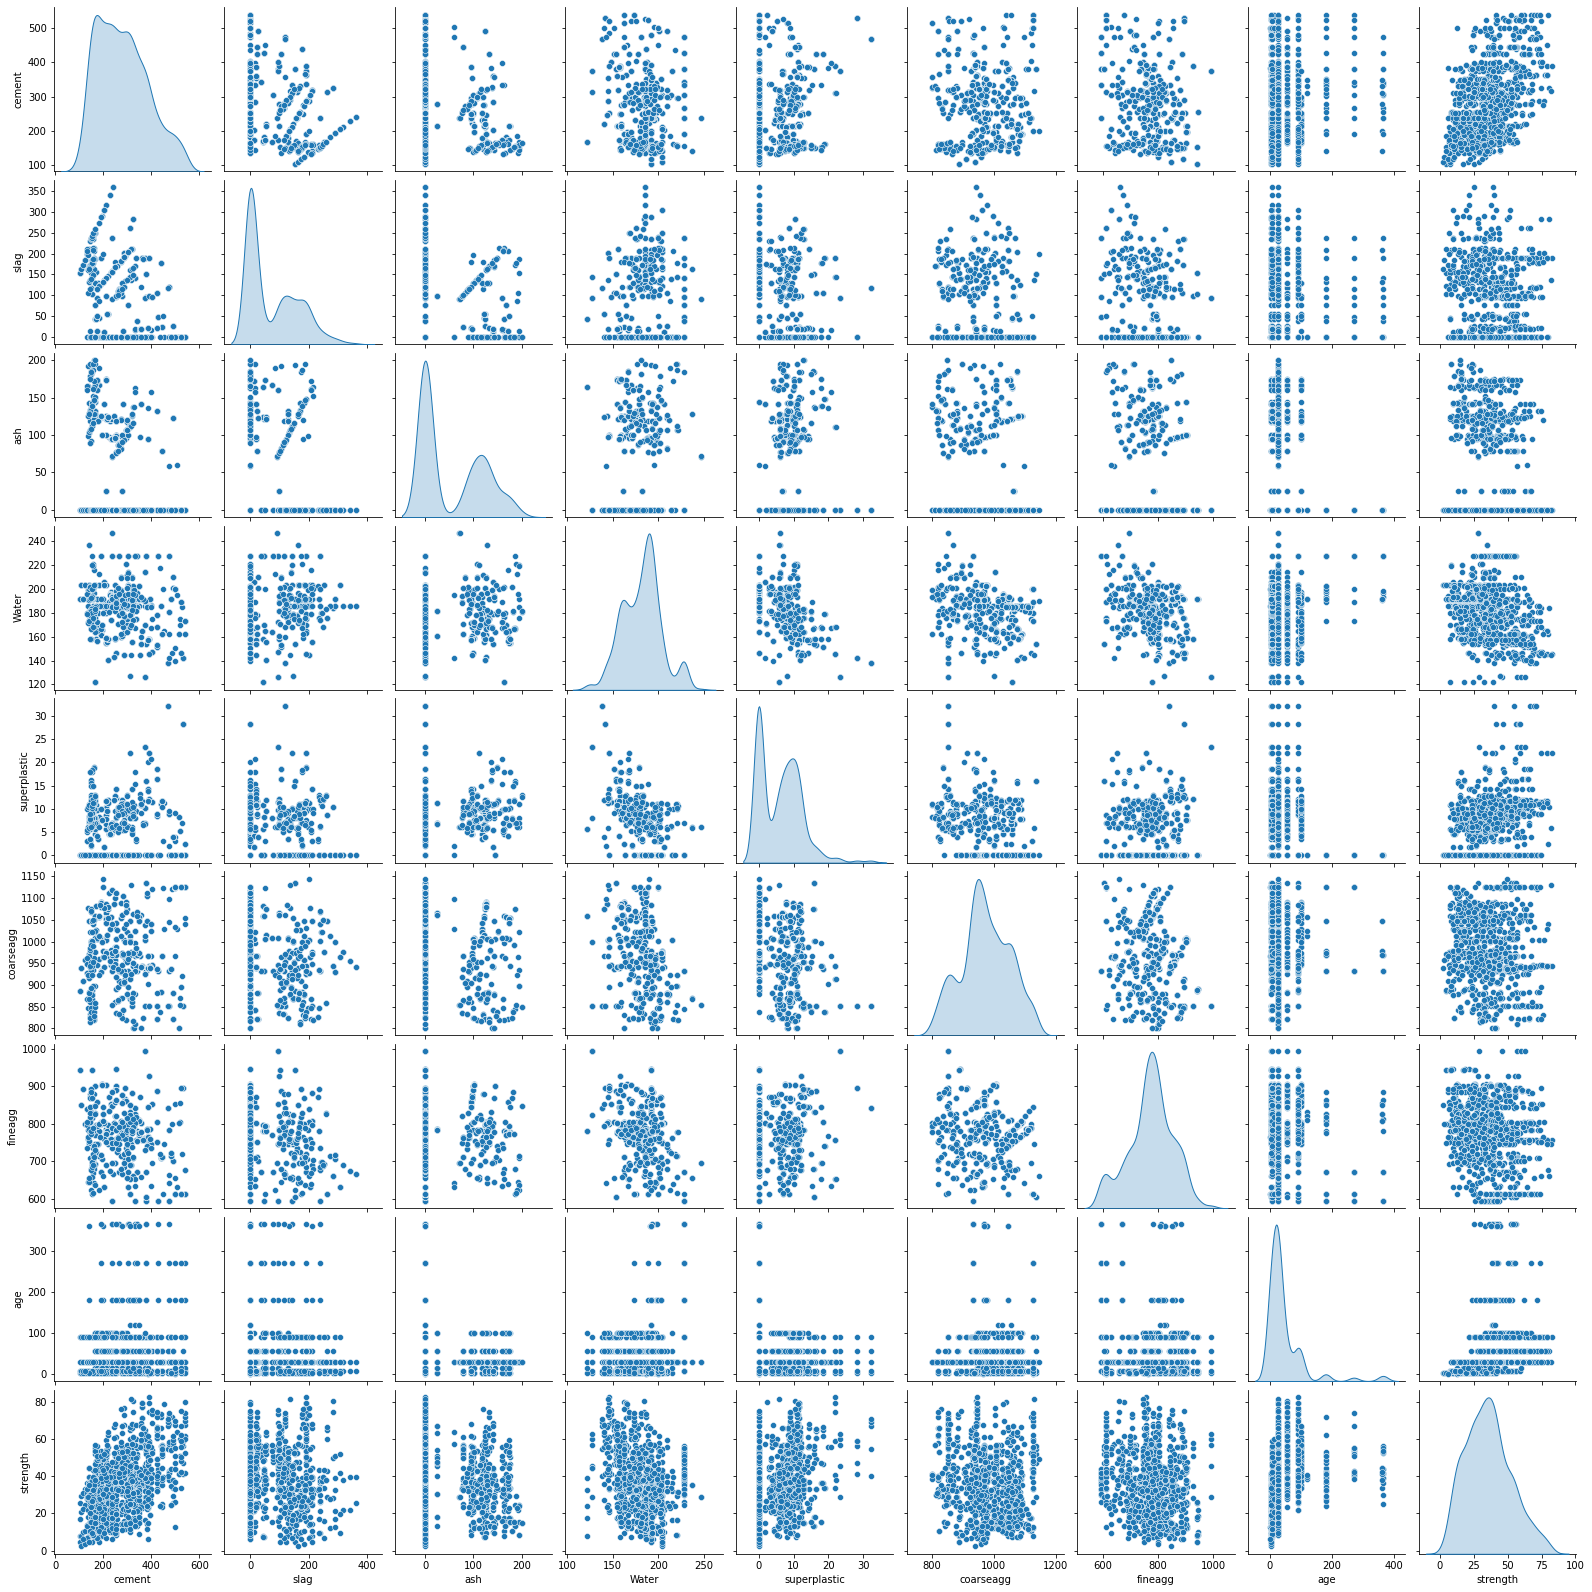

In [32]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

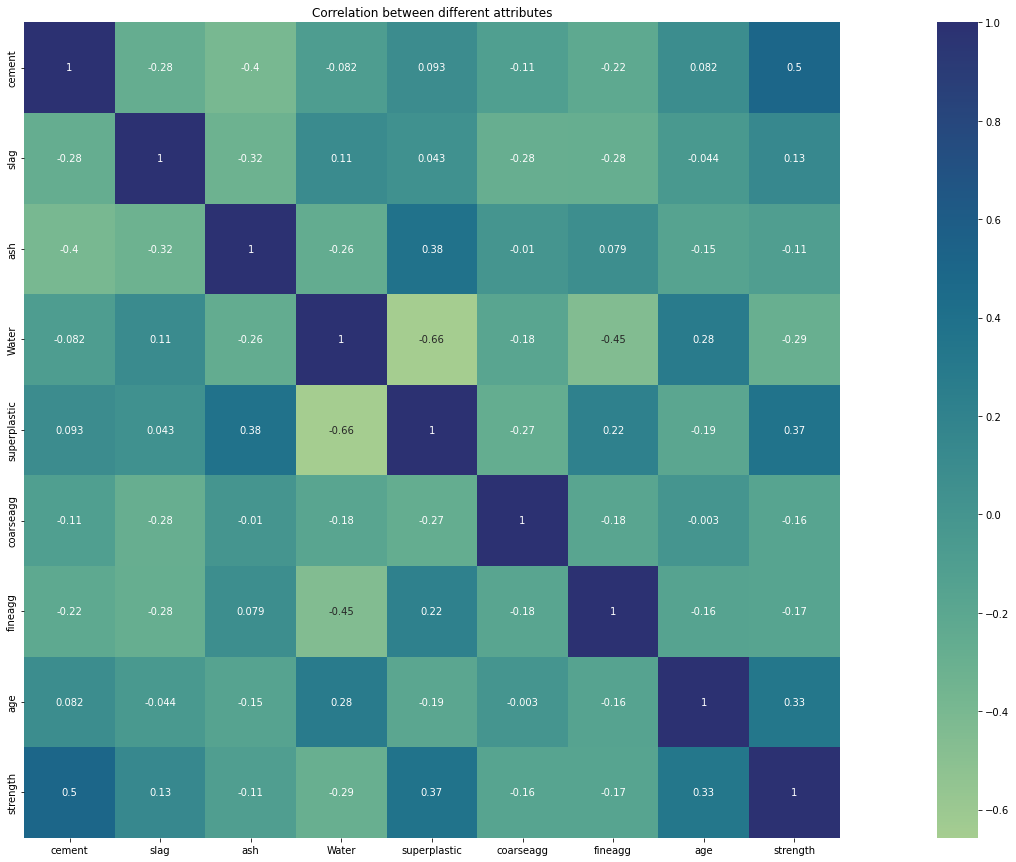

In [33]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='crest')
plt.title('Correlation between different attributes')
plt.show()

<AxesSubplot:>

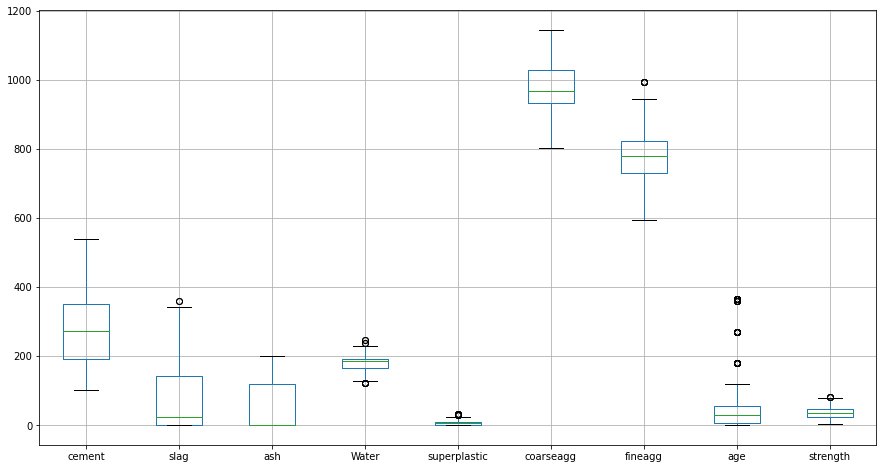

In [34]:
df.boxplot(figsize=(15,8))

In [35]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


In [36]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<AxesSubplot:>

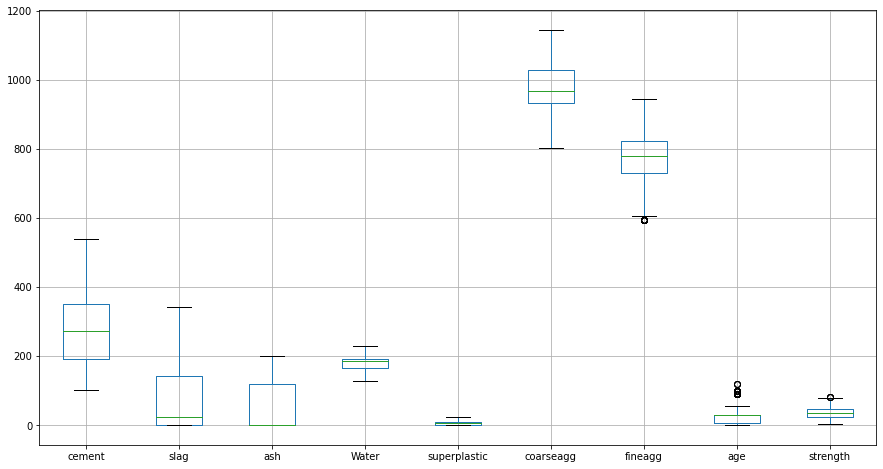

In [37]:
df.boxplot(figsize=(15,8))

## Feature Engineering

In [38]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


In [39]:
#Splitting the data into independent and dependent attributes


#independent and dependent variables
X = df.drop('strength', axis = 1)
y = df['strength']

In [40]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

#  Building Different Models

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model=RandomForestRegressor()

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = model.predict(X_test)

In [47]:
model.score(X_train, y_train)

0.9815508775099729

In [48]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.8737337423355922

In [49]:
from sklearn import metrics
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.8737337423355922

In [50]:
metrics.mean_squared_error(y_test, y_pred)

33.095328099171354

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734


In [54]:
from sklearn.model_selection import KFold,cross_val_score
k = 10

kfold = KFold(n_splits=k)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7138997638593867

In [55]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900


### Gradient boosting regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [57]:
y_pred = model.predict(X_test)

In [58]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9479484642544256

In [59]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.882467591122282

In [60]:
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

0.882467591122282

In [61]:
metrics.mean_squared_error(y_test, y_pred)

30.806121176350448

In [62]:
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468


In [63]:
k = 5

kfold = KFold(n_splits=k)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

0.7631399192997333

In [64]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140


### ADA Boost Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor

In [66]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [67]:
y_pred = model.predict(X_test)

In [68]:
model.score(X_test, y_test)

0.7642417245245052

In [69]:
acc_Ada=metrics.r2_score(y_test, y_pred)
acc_Ada

0.7642417245245052

In [70]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242


In [71]:
k = 5

kfold = KFold(n_splits=k)
results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

0.6281352398032262

In [72]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135


### KNN Regressor

In [73]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

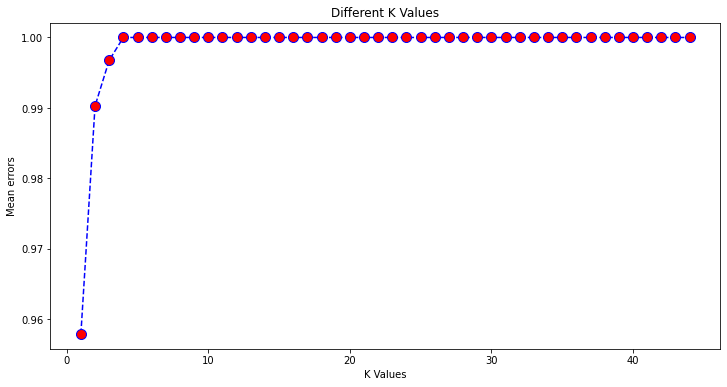

In [74]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [75]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [76]:
y_pred = model.predict(X_test)

In [77]:
model.score(X_train, y_train)

0.9079129283309701

In [78]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

0.7535181554806387

In [79]:
metrics.mean_squared_error(y_test, y_pred)

64.6047302402677

In [80]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135
7,KNN Regressor,0.753518


### Bagging Regressor

In [81]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [82]:
y_pred = model.predict(X_test)

In [83]:
model.score(X_train, y_train)

0.9765756632383852

In [84]:
model.score(X_test, y_test)

0.8597419984164592

In [85]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

0.8597419984164592

In [86]:
metrics.mean_squared_error(y_test, y_pred)

36.762668560896465

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135
7,KNN Regressor,0.753518
9,Bagging Regressor,0.859742


### Support Vector Regressor

In [88]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [89]:
y_pred = model.predict(X_test)

In [90]:
model.score(X_train, y_train)

0.7296534161238828

In [91]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

0.6550336531634067

In [92]:
metrics.mean_squared_error(y_test, y_pred)

90.41825300685834

In [93]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135
7,KNN Regressor,0.753518
9,Bagging Regressor,0.859742
11,Support Vector Regressor,0.655034


### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.308578
slag            0.058507
ash             0.008609
Water           0.121639
superplastic    0.053961
coarseagg       0.025567
fineagg         0.050289
age             0.372850


In [98]:
y_pred = dec_model.predict(X_test)

In [99]:
dec_model.score(X_train, y_train)

0.9938748100766917

In [100]:
dec_model.score(X_test, y_test)

0.7645970040451218

In [101]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

0.7645970040451218

In [102]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135
7,KNN Regressor,0.753518
9,Bagging Regressor,0.859742
11,Support Vector Regressor,0.655034
14,Decision Tree Regressor 1,0.764597


## Feature Selection

In [103]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [104]:
X = df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = df2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

In [105]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [106]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.353158
slag            0.071312
Water           0.137934
superplastic    0.060906
age             0.376691


In [108]:
y_pred = decNew_Model.predict(X_test)

In [109]:
decNew_Model.score(X_train, y_train)

0.9919795459520203

In [110]:
decNew_Model.score(X_test, y_test)

0.7669317848275179

In [111]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

0.7669317848275179

In [112]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index={'16'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873734
2,Random Forest Regressor k_fold,0.713900
3,Gradient Boost Regressor,0.882468
4,Gradient Boost Regressor k fold,0.763140
5,Ada Boost Regressor,0.764242
6,Ada Boost Regressor k fold,0.628135
7,KNN Regressor,0.753518
9,Bagging Regressor,0.859742
11,Support Vector Regressor,0.655034
14,Decision Tree Regressor 1,0.764597


In [113]:
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

In [114]:
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

In [115]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [116]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.366830
slag            0.012691
Water           0.106080
superplastic    0.036275
age             0.478124
